# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## **Definisi Variabel Relevan Hotel Booking Clustering**

- **lead_time**  
  Jumlah hari antara pemesanan masuk ke sistem PMS dan tanggal kedatangan.
- **stays_in_weekend_nights**  
  Jumlah malam akhir pekan (Sabtu-Minggu) yang dipesan atau dihabiskan di hotel.
- **stays_in_week_nights**  
  Jumlah malam hari kerja (Senin-Jumat) yang dipesan atau dihabiskan di hotel.
- **market_segment**  
  Segmen pasar pemesanan.  
  - **TA**: Travel Agents (Agen Perjalanan)  
  - **TO**: Tour Operators (Operator Tur)  
- **distribution_channel**  
  Saluran distribusi pemesanan.  
  - **TA**: Travel Agents  
  - **TO**: Tour Operators  
- **previous_cancellations**  
  Jumlah pemesanan sebelumnya yang dibatalkan.
- **previous_bookings_not_canceled**  
  Jumlah pemesanan sebelumnya yang tidak dibatalkan.
- **customer_type**  
  Jenis pemesanan:  
  - **Contract**: Pemesanan yang memiliki alokasi atau tipe kontrak lainnya yang terkait dengannya.  
  - **Group**: Pemesanan yang terkait dengan kelompok.  
  - **Transient**: Pemesanan yang tidak termasuk kelompok atau kontrak, dan tidak terkait dengan pemesanan transient lainnya.  
  - **Transient-party**: Pemesanan yang bersifat transient, tetapi terkait dengan setidaknya satu pemesanan transient lainnya.
- **adr (Average Daily Rate)**  
  Rata-rata tarif harian, dihitung dari total transaksi penginapan dibagi jumlah malam menginap.
- **total_of_special_requests**  
  Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya tempat tidur kembar atau lantai atas).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/mrickyrizaldi/Project_MLP/main/Clustering/hotel_bookings_dataset.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
# Membuat fitur baru cancellation_ratio (rasio pembatalan terhadap total pemesanan (baik yang dibatalkan maupun tidak))
data.loc[:, 'cancellation_ratio'] = data['previous_cancellations'] / (data['previous_cancellations'] + data['previous_bookings_not_canceled'] + 1)


In [52]:
# Membuat variabel baru 'df' yang hanya berisi fitur relevan
df = data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adr', 'total_of_special_requests', 'previous_cancellations',
            'previous_bookings_not_canceled', 'customer_type', 'market_segment',
            'distribution_channel', 'cancellation_ratio']]

In [53]:
# deklarasi fitur numerik
fitur_Numerikal = df.select_dtypes(include=['number'])

# deklarasi fitur kategorikal
fitur_Kategorikal = df.select_dtypes(include=['object'])

# Menampilkan nama fitur
print(f"fitur numerikal yang relevan = {fitur_Numerikal.columns.tolist()}")
print(f"fitur kategorikal yang relevan = {fitur_Kategorikal.columns.tolist()}")

fitur numerikal yang relevan = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'total_of_special_requests', 'previous_cancellations', 'previous_bookings_not_canceled', 'cancellation_ratio']
fitur kategorikal yang relevan = ['customer_type', 'market_segment', 'distribution_channel']


In [54]:
nilai_hilang = df.isnull().sum()
nilai_hilang[nilai_hilang > 0]

,0


In [55]:
# data deskriptif fitur numerikal
df.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,101.831122,0.571363,0.087118,0.137097,0.026124
std,106.863097,0.998613,1.908286,50.535790,0.792798,0.844336,1.497437,0.112904
min,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,69.290000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,94.575000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,126.000000,1.000000,0.000000,0.000000,0.000000
max,737.000000,19.000000,50.000000,5400.000000,5.000000,26.000000,72.000000,0.962963


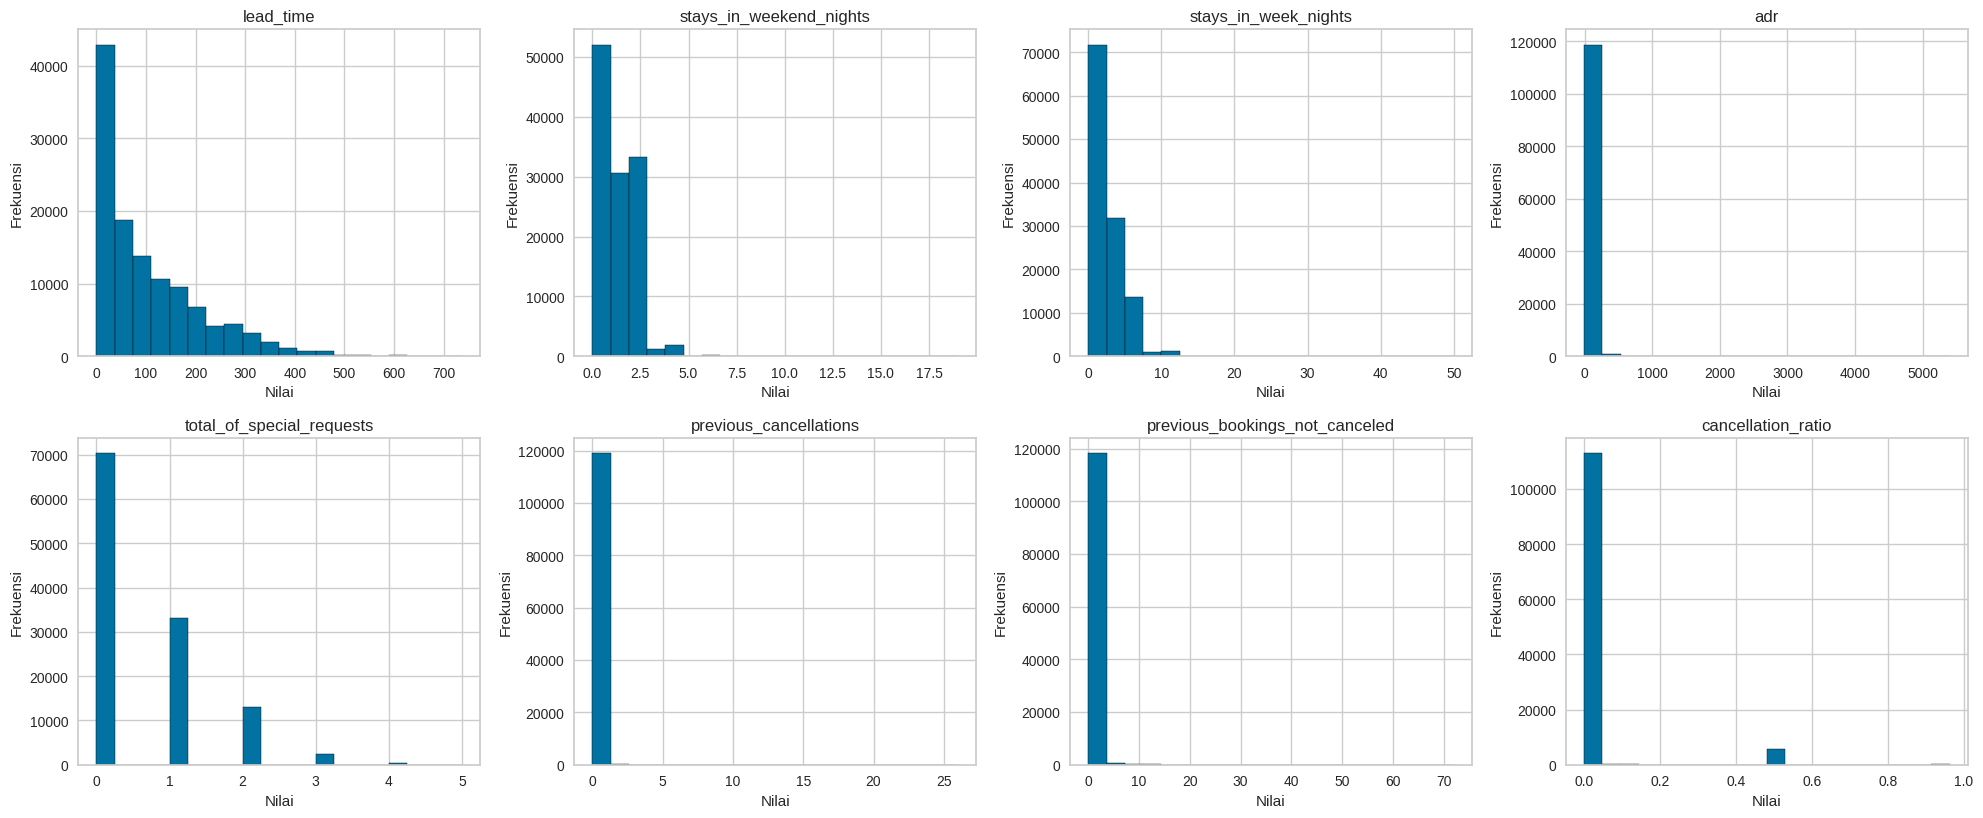

In [56]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols)

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(fitur_Numerikal.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

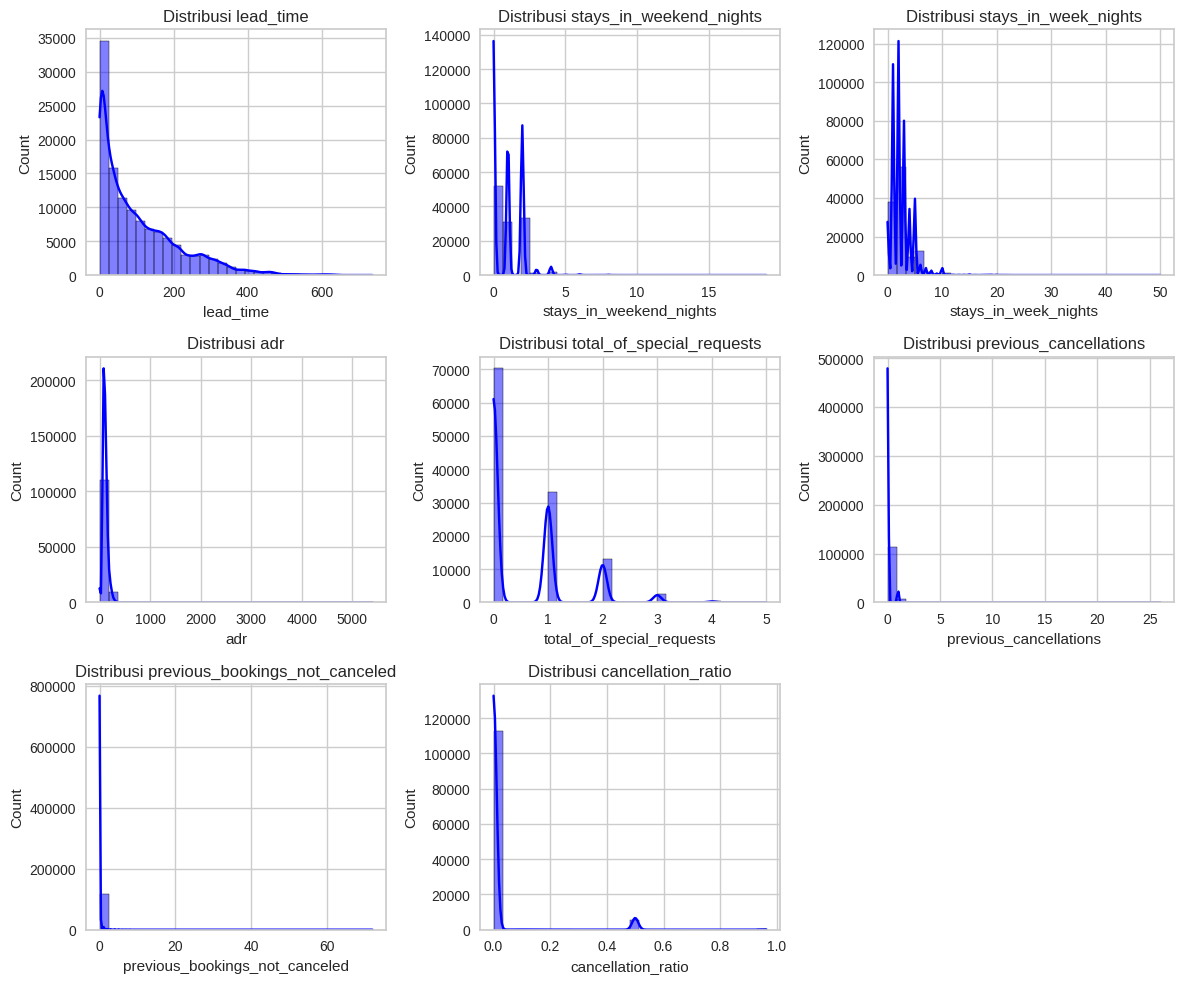

In [57]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(fitur_Numerikal.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

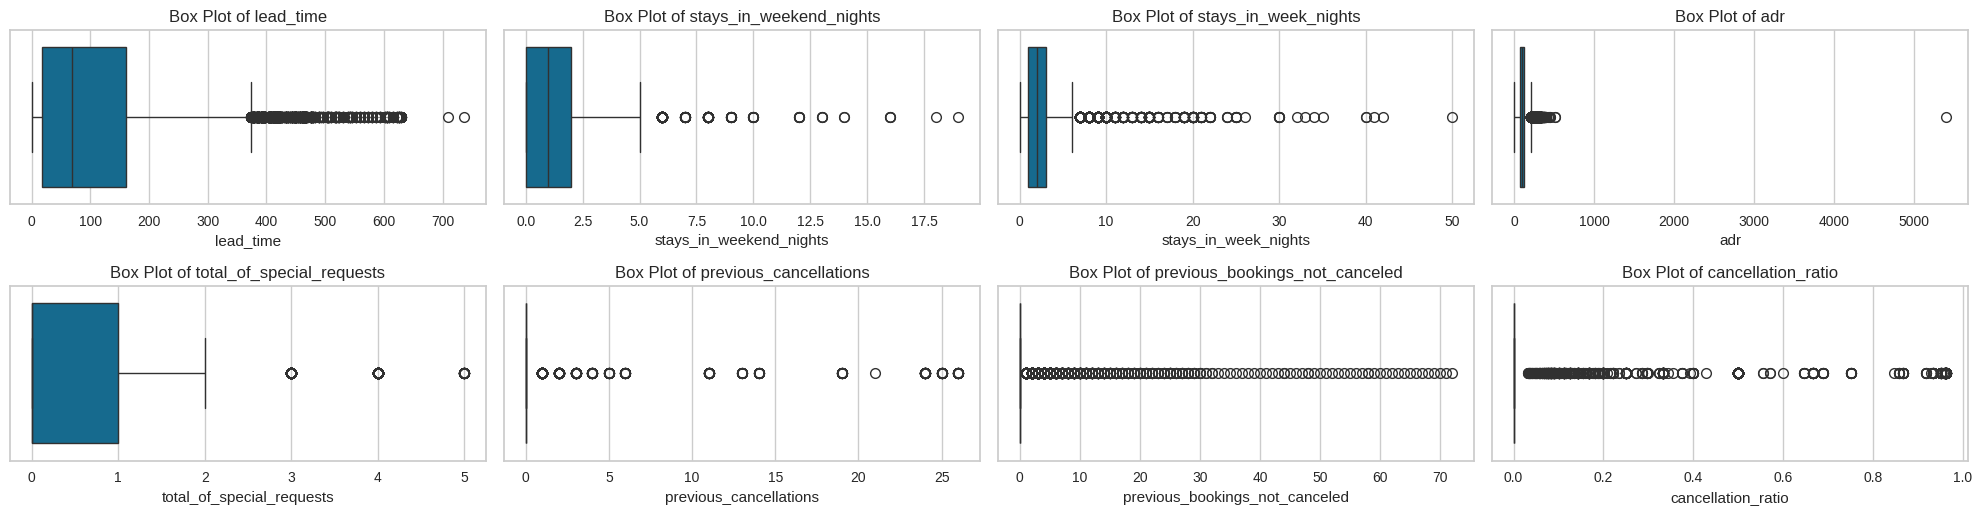

In [58]:
num_plots = len(fitur_Numerikal)
n_cols, n_rows = 4 , 4

# Buat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# Iterasi membuat box plot
for i, fitur in enumerate(fitur_Numerikal):
    sns.boxplot(x=df[fitur], ax=axes[i])
    axes[i].set_title(f'Box Plot of {fitur}')
    axes[i].set_xlabel(fitur)

# Hapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

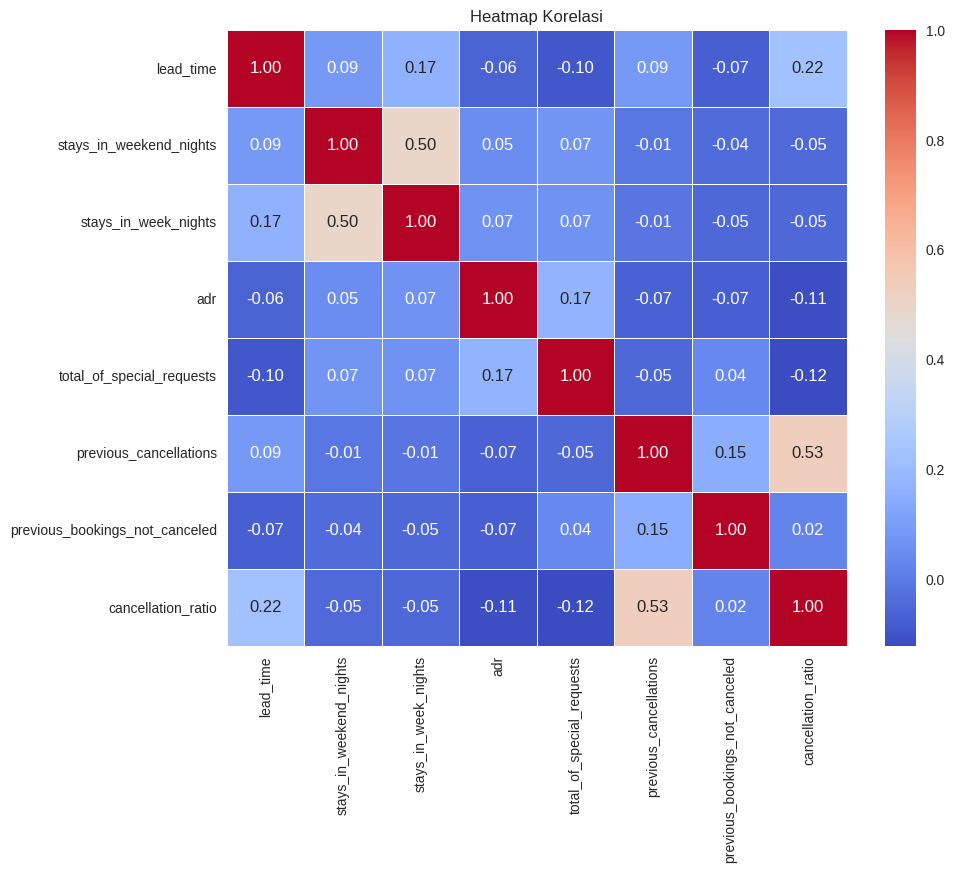

In [59]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = fitur_Numerikal.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

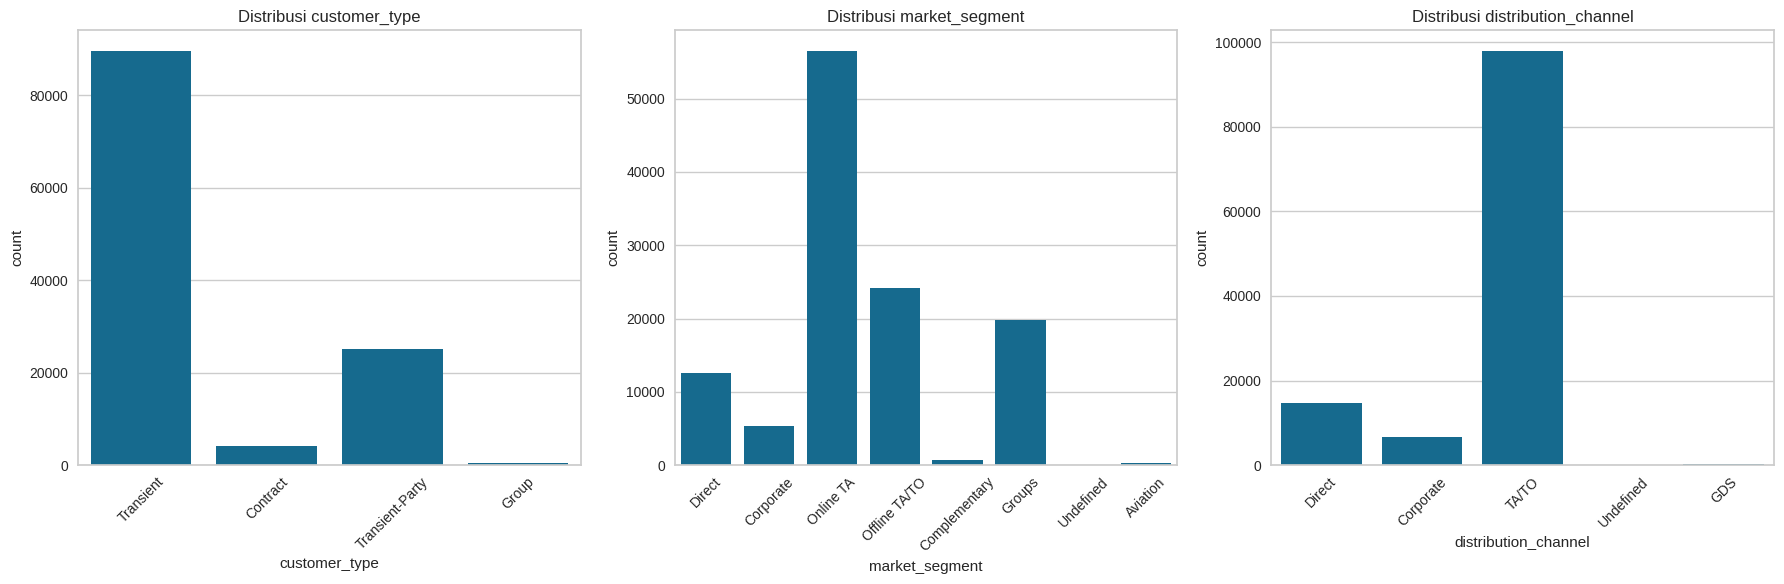

In [60]:
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3
n_rows = 1

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(fitur_Kategorikal):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [135]:
# Mengidentifikasi data kosong
nilai_hilang = df.isnull().sum()
nilai_hilang[nilai_hilang > 0]

,0


In [136]:
# Mengidentifikasi baris duplikat
duplikat = df.duplicated()

print("Baris duplikat:")
df[duplikat]

Baris duplikat:


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,customer_type,market_segment,distribution_channel,cancellation_ratio
5,14,0,2,98.00,1,0,0,Transient,Online TA,TA/TO,0.0
15,68,0,4,97.00,3,0,0,Transient,Online TA,TA/TO,0.0
22,72,2,4,84.67,1,0,0,Transient,Direct,Direct,0.0
43,70,2,3,137.00,1,0,0,Transient,Direct,Direct,0.0
59,14,0,2,98.00,1,0,0,Transient,Online TA,TA/TO,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119352,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO,0.0
119353,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO,0.0
119354,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO,0.0
119367,212,2,5,85.59,0,0,0,Transient,Online TA,TA/TO,0.0


In [137]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {df_cleaned.shape}")

Jumlah data setelah menghapus duplikat: (77687, 11)


In [138]:
# Penanganan nilai negatif pada fitur adr
# Hitung proporsi nilai negatif
negative_adr_count = (df_cleaned['adr'] < 0).sum()
total_count = len(df_cleaned)
print(f"Jumlah nilai negatif: {negative_adr_count}")
print(f"Proporsi nilai negatif: {negative_adr_count / total_count * 100:.2f}%")

# Menghapus nilai negatif pada kolom 'adr' karena data negatif hanya 1
df_cleaned = df_cleaned[df_cleaned['adr'] >= 0]
df_cleaned.shape

Jumlah nilai negatif: 1
Proporsi nilai negatif: 0.00%


(77686, 11)

In [139]:
# fungsi untuk deteksi outliers
def deteksi_outliers(df, fitur):
    for col in fitur:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        prop = (count / len(df)) * 100

        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")

deteksi_outliers(df_cleaned, fitur_Numerikal)

Fitur lead_time: Jumlah outliers = 1995, Proporsi = 2.57%
Fitur stays_in_weekend_nights: Jumlah outliers = 214, Proporsi = 0.28%
Fitur stays_in_week_nights: Jumlah outliers = 1489, Proporsi = 1.92%
Fitur adr: Jumlah outliers = 2324, Proporsi = 2.99%
Fitur total_of_special_requests: Jumlah outliers = 2578, Proporsi = 3.32%
Fitur previous_cancellations: Jumlah outliers = 1637, Proporsi = 2.11%
Fitur previous_bookings_not_canceled: Jumlah outliers = 3346, Proporsi = 4.31%
Fitur cancellation_ratio: Jumlah outliers = 1637, Proporsi = 2.11%


In [140]:
# Penanganan Outliers dengan transformasi karena data mengandung variasi
# Copy dataset untuk transformasi
df_transformed = df_cleaned.copy()

# Square Root Transform untuk fitur dengan banyak nilai nol
sqrt_features = ['previous_cancellations', 'previous_bookings_not_canceled', 'cancellation_ratio']
for feature in sqrt_features:
    df_transformed[feature] = np.sqrt(df_transformed[feature].clip(lower=0))

# Log Transform untuk fitur skewed tanpa nilai nol/negatif
log_features = ['lead_time', 'adr']
for feature in log_features:
    df_transformed[feature] = np.log1p(df_transformed[feature].fillna(0))

# Box-Cox Transform untuk fitur distribusi kompleks
boxcox_lambdas = {}
boxcox_features = ['total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']
for feature in boxcox_features:
    df_transformed[feature], boxcox_lambdas[feature] = boxcox(df_transformed[feature].fillna(0).clip(lower=0) + 1)

In [141]:
# Normalisasi MinMax Scaling untuk semua fitur numerik
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_transformed[fitur_Numerikal.columns])

# Buat DataFrame hasil scaling
df_scaled = pd.DataFrame(df_scaled, columns=fitur_Numerikal.columns, index=df_transformed.index)

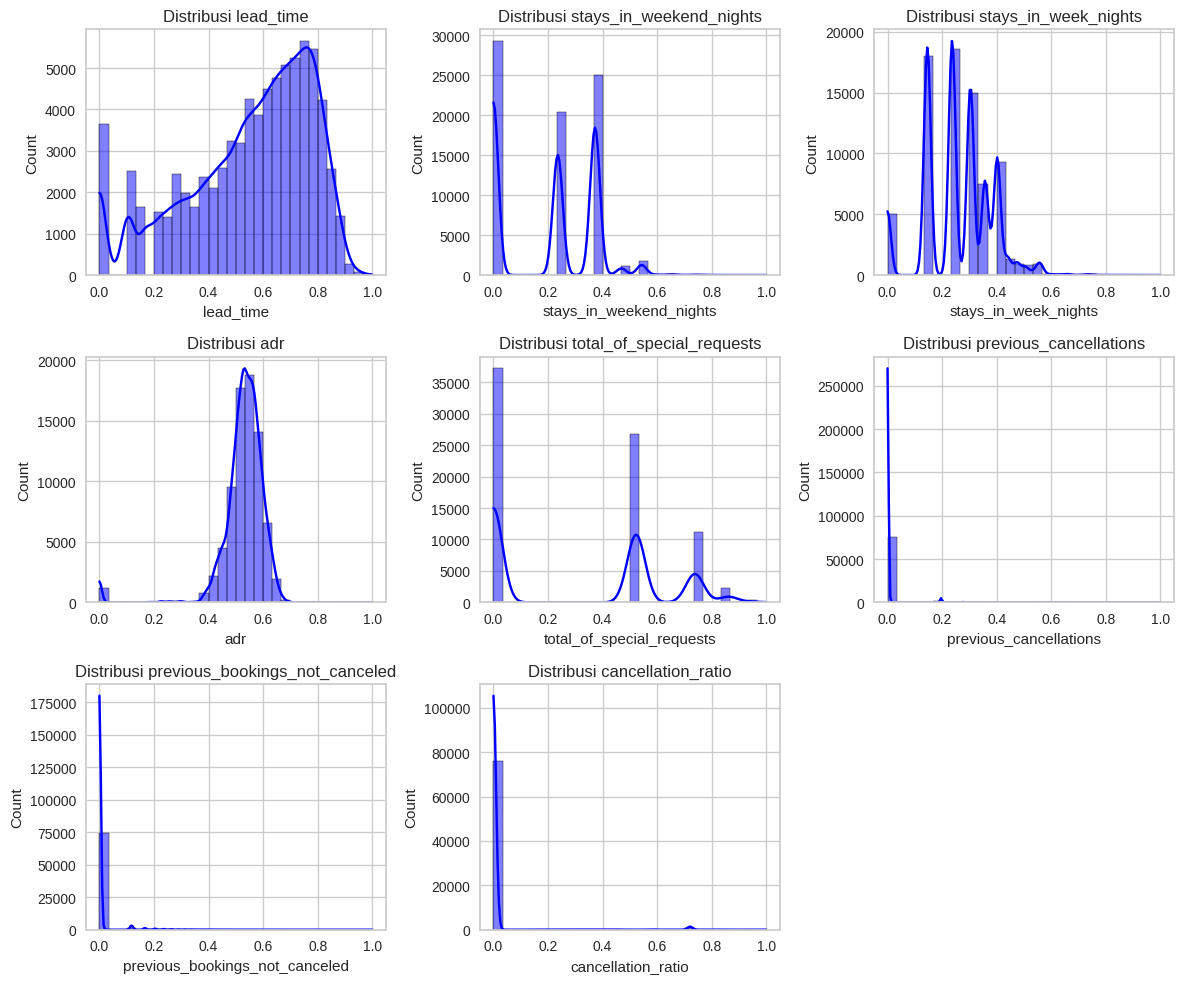

In [142]:
# Melihat Distribusi Data Setelah Scaling
plt.figure(figsize=(12, 10))
for i, column in enumerate(fitur_Numerikal.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_scaled[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [143]:
# Evaluasi Outliers
deteksi_outliers(df_scaled, fitur_Numerikal)

Fitur lead_time: Jumlah outliers = 0, Proporsi = 0.00%
Fitur stays_in_weekend_nights: Jumlah outliers = 5, Proporsi = 0.01%
Fitur stays_in_week_nights: Jumlah outliers = 126, Proporsi = 0.16%
Fitur adr: Jumlah outliers = 2147, Proporsi = 2.76%
Fitur total_of_special_requests: Jumlah outliers = 0, Proporsi = 0.00%
Fitur previous_cancellations: Jumlah outliers = 1637, Proporsi = 2.11%
Fitur previous_bookings_not_canceled: Jumlah outliers = 3346, Proporsi = 4.31%
Fitur cancellation_ratio: Jumlah outliers = 1637, Proporsi = 2.11%


> Data Outliers yang tersisa dibiarkan saja karena merupakan variasi data asli sehingga jika dihapus dapat mempengaruhi clustering


In [146]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=fitur_Kategorikal.columns, drop_first=False)

# Konversi semua kolom hasil encoding dari boolean ke numerik
df_encoded = df_encoded.astype(float)

# Periksa hasil encoding
print("Hasil One-Hot Encoding:")
df_encoded.head()

Hasil One-Hot Encoding:


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,342.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7.0,0.0,1.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.0,0.0,1.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14.0,0.0,2.0,98.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
# Gabungkan dengan data numerikal yang sudah distandarisasi
final_data = pd.concat([df_scaled, df_encoded.drop(columns=fitur_Numerikal.columns)], axis=1)

# Periksa dimensi data akhir
print("Dimensi data akhir setelah One-Hot Encoding dan scaling:", final_data.shape)

Dimensi data akhir setelah One-Hot Encoding dan scaling: (77686, 25)


In [148]:
final_data.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
count,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,...,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000
mean,0.549759,0.202639,0.259773,0.528068,0.315154,0.004814,0.009318,0.012838,0.038874,0.006694,...,0.127951,0.041925,0.157107,0.620279,0.000026,0.051335,0.137991,0.002137,0.808473,0.000064
std,0.232511,0.171534,0.121762,0.086110,0.313948,0.035589,0.052173,0.091211,0.193297,0.081541,...,0.334037,0.200420,0.363904,0.485320,0.005074,0.220681,0.344893,0.046176,0.393506,0.008022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410066,0.000000,0.146169,0.503599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.604031,0.235783,0.237032,0.536995,0.522941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.734717,0.372466,0.357482,0.573069,0.522941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [149]:
# Memilih fitur yang ingin digunakan
seleksi_fitur = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adr', 'total_of_special_requests', 'previous_bookings_not_canceled',
    'cancellation_ratio','customer_type_Contract', 'customer_type_Group',
    'customer_type_Transient', 'customer_type_Transient-Party',
    'market_segment_Aviation', 'market_segment_Complementary',
    'market_segment_Corporate', 'market_segment_Direct',
    'market_segment_Groups', 'market_segment_Offline TA/TO',
    'market_segment_Online TA'
]

# Menyiapkan data berisi fitur untuk pelatihan
fitur = final_data[seleksi_fitur].values  # Mengambil nilai dari DataFrame

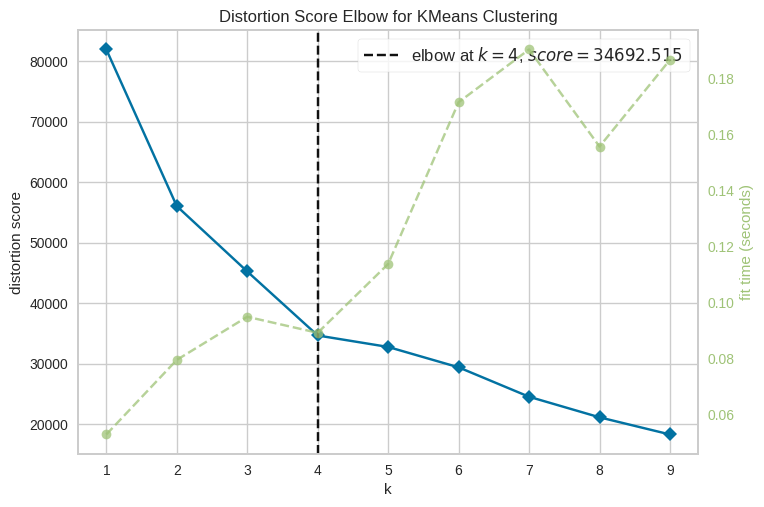

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
# Inisialisasi model KMeans dengan random_state untuk konsistensi
kmeans = KMeans(init='k-means++', random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data yang sudah di-scQale untuk menemukan jumlah cluster optimal
visualizer.fit(fitur)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

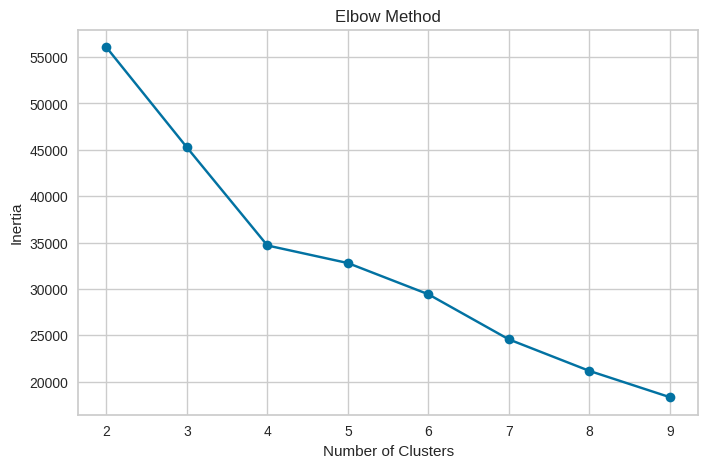

In [73]:
inertia = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fitur)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

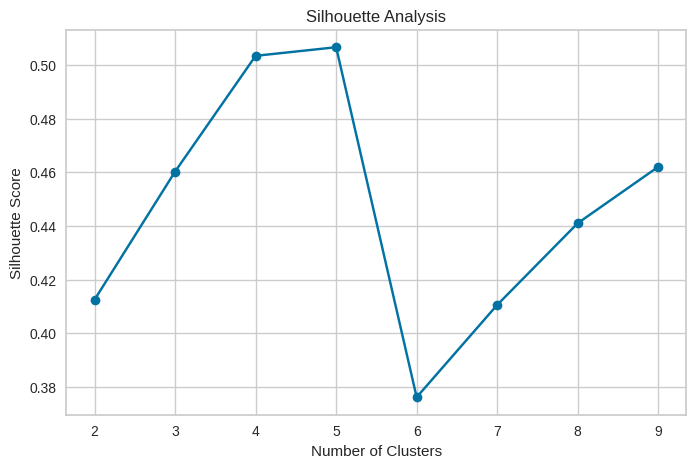

In [74]:
silhouette_scores = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(fitur)
    silhouette = silhouette_score(fitur, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [129]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(fitur)
labels = kmeans.labels_ + 1

# Evaluasi model
print("Metrik Evaluasi K-Means Sebelum Feature Selection:")
silhouette_avg = silhouette_score(fitur, labels)
davies_bouldin = davies_bouldin_score(fitur, labels)
calinski_harabasz = calinski_harabasz_score(fitur, labels)
print(f"Silhouette Score : {silhouette_avg}")
print(f"Davies-Bouldin Index : {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Metrik Evaluasi K-Means Sebelum Feature Selection:
Silhouette Score : 0.503447657758789
Davies-Bouldin Index : 1.0871772705838025
Calinski-Harabasz Index: 35281.04294623962


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [111]:
#Feature Selection dengan metode PCA
pca = PCA()
pca.fit(fitur)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, cumulative_var in enumerate(cumulative_variance):
    if cumulative_var >= 0.60:  # Threshold 60% varians
        print(f"Jumlah komponen untuk 60% varians: {i+1}")
        break

Jumlah komponen untuk 60% varians: 3


In [134]:
# Inisialisasi PCA dengan 3 komponen utama
pca = PCA(n_components=3)
fitur_pca = pca.fit_transform(fitur)

# Menampilkan kontribusi setiap fitur pada komponen utama
loadings = pd.DataFrame(pca.components_, columns=seleksi_fitur, index=[f'PC{i+1}' for i in range(3)])
loadings

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
PC1,0.023022,-0.009293,-0.007815,0.038520,0.199975,-0.009845,-0.011443,-0.063574,-0.011134,0.318369,-0.243661,-0.002528,-0.006390,-0.066598,-0.203427,-0.103489,-0.384515,0.767006
PC2,-0.122075,-0.012480,-0.016092,0.007354,-0.071288,0.013018,-0.007221,-0.116078,-0.010852,0.637296,-0.510365,0.003730,0.009102,0.026428,0.418511,-0.150595,0.009779,-0.316849
PC3,0.166736,0.092626,0.065113,-0.010423,-0.105390,-0.013868,-0.005866,0.087991,-0.005035,0.183243,-0.266199,-0.001034,-0.005077,-0.067104,-0.559979,-0.126577,0.706202,0.053674


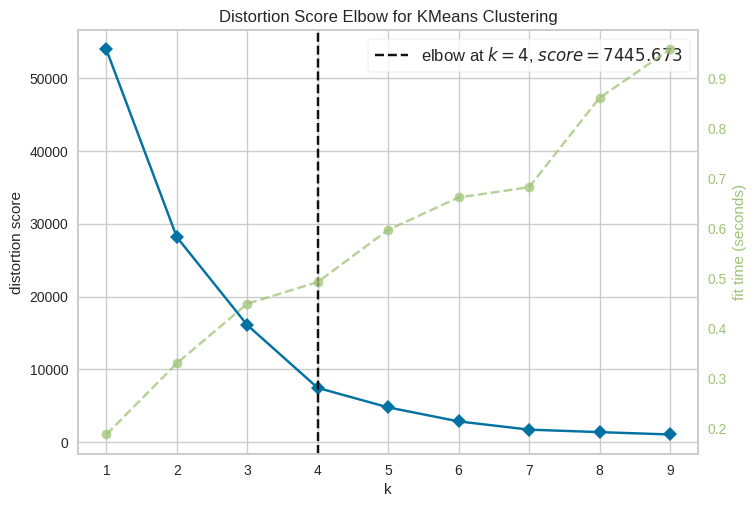

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# Inisialisasi model KMeans dengan random_state untuk konsistensi
kmeans = KMeans(init='k-means++', n_init=20, max_iter=500, random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data hasil PCA
visualizer.fit(fitur_pca)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [128]:
kmeans = KMeans(init='k-means++', n_clusters=4,random_state=42)
kmeans.fit(fitur_pca)
labels_PCA = kmeans.labels_ + 1

# Evaluasi model
print("Metrik Evaluasi Setelah PCA (Feature Selection):")
silhouette_avg = silhouette_score(fitur_pca, labels_PCA)
davies_bouldin = davies_bouldin_score(fitur_pca, labels_PCA)
calinski_harabasz = calinski_harabasz_score(fitur_pca, labels_PCA)
print(f"Silhouette Score : {silhouette_avg}")
print(f"Davies-Bouldin Index : {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Metrik Evaluasi Setelah PCA (Feature Selection):
Silhouette Score : 0.7767984283883611
Davies-Bouldin Index : 0.5380274402173391
Calinski-Harabasz Index: 161728.5370878601


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

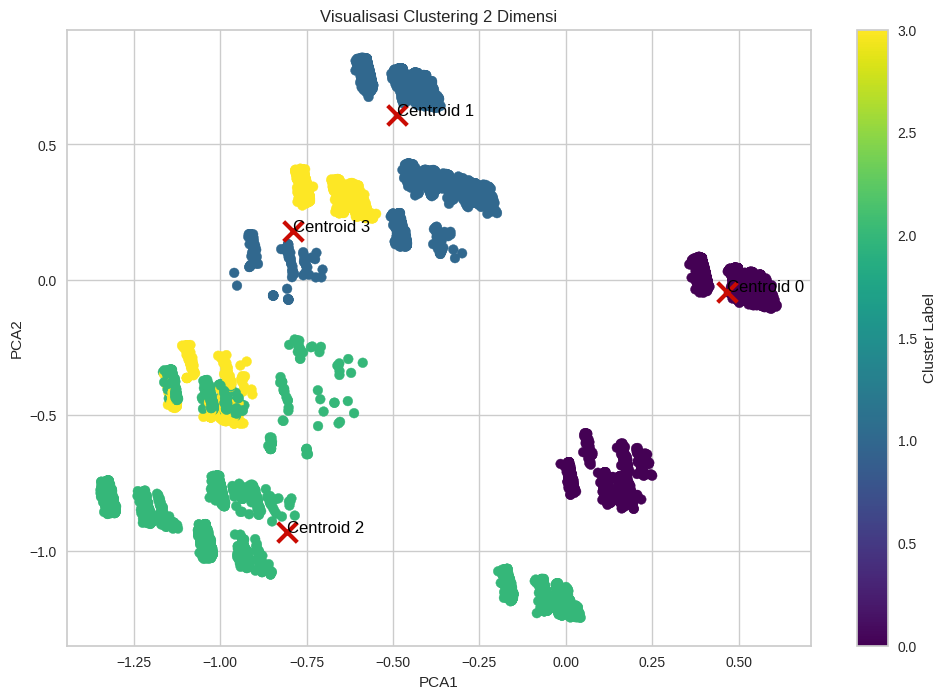

In [115]:
fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(fitur_pca[:, 0], fitur_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("Visualisasi Clustering 2 Dimensi")

# Menambahkan color bar
fig.colorbar(sc, ax=ax, label='Cluster Label')

# centroids
centroids = kmeans.cluster_centers_

# Plot centroids dengan 'x' markers dan keterangan
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, linewidths=3, color='r')
    plt.text(centroids[i, 0], centroids[i, 1], f'Centroid {i}', fontsize=12, color='black')

plt.show()

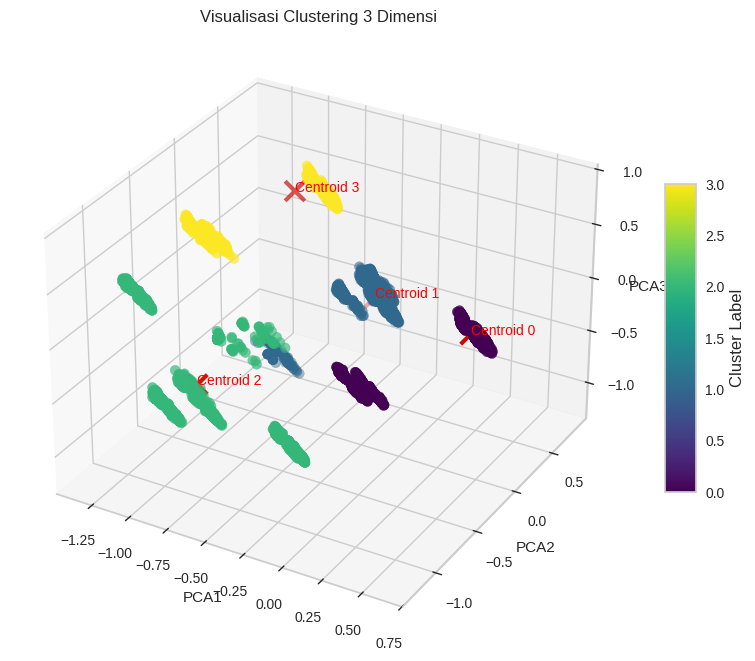

In [116]:
# Plot 3D untuk visualisasi clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk data
sc = ax.scatter(fitur_pca[:, 0], fitur_pca[:, 1], fitur_pca[:, 2], c=kmeans.labels_, cmap='viridis', s=50)

# Menambahkan centroid ke plot
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='r')

# Menambahkan label centroid
for idx, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], f"Centroid {idx}", fontsize=10, color='red')

# Menambahkan label pada sumbu dan judul
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("Visualisasi Clustering 3 Dimensi")

# Menambahkan colorbar dengan label
cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cb.set_label('Cluster Label', fontsize=12)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [152]:
# Memasukkan Label Hasil Clustering ke df hasil
final_data['Cluster'] = labels_PCA

# Buat dataframe baru untuk data yang di inverse untuk interpretasi
df_normalized = final_data.copy()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [153]:
# Inverse transform untuk normalisasi MinMaxScaler
df_normalized[fitur_Numerikal.columns] = scaler.inverse_transform(df_normalized[fitur_Numerikal.columns])

# Inverse Box-Cox Transform
for feature in boxcox_features:
    df_normalized[feature] = inv_boxcox(df_normalized[feature], boxcox_lambdas[feature]) - 1

# Inverse Log Transform
for feature in log_features:
    df_normalized[feature] = np.expm1(df_normalized[feature])  # Exponential untuk membalikkan log

# Inverse Square Root Transform
for feature in sqrt_features:
    df_normalized[feature] = df_normalized[feature] ** 2  # Kuadratkan kembali nilai

In [154]:
def inverse_one_hot_encoding(df, category_dict):
    for category, columns in category_dict.items():
        existing_columns = [col for col in columns if col in df.columns]
        if existing_columns:
            df[category] = df[existing_columns].idxmax(axis=1).str.replace(f'{category}_', '', regex=True)
    return df.drop(columns=sum(category_dict.values(), []))  # Hapus kolom one-hot encoded setelah inverse

category_dict = {
    'customer_type': ['customer_type_Contract', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party'],
    'market_segment': ['market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct',
                       'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined'],
    'distribution_channel': ['distribution_channel_Direct', 'distribution_channel_Corporate', 'distribution_channel_GDS',
                             'distribution_channel_TA/TO', 'distribution_channel_Undefined']
}

df_normalized = inverse_one_hot_encoding(df_normalized, category_dict)

In [155]:
# melihat perbandingan data apakah normalize berhasil
df_normalized.describe(include='all')

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,Cluster,customer_type,market_segment,distribution_channel
count,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686,77686,77686
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transient,Online TA,TA/TO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65812,48187,62807
mean,81.466326,1.060333,2.734675,109.011053,0.736568,0.033532,0.202237,0.008170,1.782200,NaN,NaN,NaN
std,84.541203,1.043695,2.091740,55.694261,0.843573,0.390293,1.831632,0.061776,1.084229,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,14.000000,0.000000,1.000000,74.800000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,53.000000,1.000000,2.000000,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
75%,127.000000,2.000000,4.000000,136.710000,1.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN


In [156]:
df_cleaned.describe(include='all')

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,customer_type,market_segment,distribution_channel,cancellation_ratio
count,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686,77686,77686,77686.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transient,Online TA,TA/TO,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65812,48187,62807,NaN
mean,81.466326,1.060333,2.734675,109.011053,0.736568,0.033532,0.202237,NaN,NaN,NaN,0.008170
std,84.541203,1.043695,2.091740,55.694261,0.843573,0.390293,1.831632,NaN,NaN,NaN,0.061776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,14.000000,0.000000,1.000000,74.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,53.000000,1.000000,2.000000,100.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
75%,127.000000,2.000000,4.000000,136.710000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [157]:
# Analisis statistik setiap cluster
cluster_analysis_num = df_normalized.groupby("Cluster")[fitur_Numerikal.columns].agg(["min", "max", "mean"])
cluster_analysis_kat = df_normalized.groupby("Cluster")[fitur_Kategorikal.keys()].agg(lambda x: x.mode()[0])

# Gabungkan hasil agregasi
cluster_summary = pd.concat([cluster_analysis_num, cluster_analysis_kat], axis=1)

# Tampilkan hasil
cluster_summary

,"(lead_time, min)","(lead_time, max)","(lead_time, mean)","(stays_in_weekend_nights, min)","(stays_in_weekend_nights, max)","(stays_in_weekend_nights, mean)","(stays_in_week_nights, min)","(stays_in_week_nights, max)","(stays_in_week_nights, mean)","(adr, min)",...,"(previous_cancellations, mean)","(previous_bookings_not_canceled, min)","(previous_bookings_not_canceled, max)","(previous_bookings_not_canceled, mean)","(cancellation_ratio, min)","(cancellation_ratio, max)","(cancellation_ratio, mean)",customer_type,market_segment,distribution_channel
Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.0,403.0,80.789049,0.0,16.0,1.039983,0.0,41.0,2.673687,0.0,...,0.015687,0.0,22.0,0.025498,0.0,0.916667,0.004999,Transient,Online TA,TA/TO
2,0.0,737.0,51.507200,0.0,19.0,0.836689,0.0,50.0,2.287718,0.0,...,0.091910,0.0,72.0,0.973686,0.0,0.961538,0.014161,Transient,Direct,Direct
3,0.0,542.0,108.714387,0.0,14.0,0.945856,0.0,35.0,2.541317,0.0,...,0.052843,0.0,50.0,0.139733,0.0,0.960000,0.016539,Transient-Party,Groups,TA/TO
4,0.0,532.0,100.873369,0.0,16.0,1.537616,0.0,40.0,3.750368,0.0,...,0.021677,0.0,17.0,0.043943,0.0,0.962963,0.007668,Transient,Offline TA/TO,TA/TO


Analisis Hasil Agregasi Kluster

Cluster 1 :
- **Lead Time**: rata-rata **80.79**, minimum **0**, maksimum **403**.  
- **Stays in Weekend Nights**: rata-rata **1.04**, minimum **0**, maksimum **16**.  
- **Stays in Week Nights**: rata-rata **2.67**, minimum **0**, maksimum **41**.  
- **Previous Cancellations**: rata-rata **0.016**.  
- **Previous Bookings Not Canceled**: rata-rata **0.025**, minimum **0**, maksimum **22**.  
- **Cancellation Ratio**: rata-rata **0.005**, minimum **0**, maksimum **0.917**.  
- **Customer Type**: **Transient**.  
- **Market Segment**: **Online TA**.  
- **Distribution Channel**: **TA/TO**.  

---

Cluster 2 :
- **Lead Time**: rata-rata **51.51**, minimum **0**, maksimum **737**.  
- **Stays in Weekend Nights**: rata-rata **0.84**, minimum **0**, maksimum **19**.  
- **Stays in Week Nights**: rata-rata **2.29**, minimum **0**, maksimum **50**.  
- **Previous Cancellations**: rata-rata **0.092**.  
- **Previous Bookings Not Canceled**: rata-rata **0.974**, minimum **0**, maksimum **72**.  
- **Cancellation Ratio**: rata-rata **0.014**, minimum **0**, maksimum **0.962**.  
- **Customer Type**: **Transient**.  
- **Market Segment**: **Direct**.  
- **Distribution Channel**: **Direct**.  

---

Cluster 3 :
- **Lead Time**: rata-rata **108.71**, minimum **0**, maksimum **542**.  
- **Stays in Weekend Nights**: rata-rata **0.95**, minimum **0**, maksimum **14**.  
- **Stays in Week Nights**: rata-rata **2.54**, minimum **0**, maksimum **35**.  
- **Previous Cancellations**: rata-rata **0.053**.  
- **Previous Bookings Not Canceled**: rata-rata **0.14**, minimum **0**, maksimum **50**.  
- **Cancellation Ratio**: rata-rata **0.017**, minimum **0**, maksimum **0.96**.  
- **Customer Type**: **Transient-Party**.  
- **Market Segment**: **Groups**.  
- **Distribution Channel**: **TA/TO**.  

---

Cluster 4 :
- **Lead Time**: rata-rata **100.87**, minimum **0**, maksimum **532**.  
- **Stays in Weekend Nights**: rata-rata **1.54**, minimum **0**, maksimum **16**.  
- **Stays in Week Nights**: rata-rata **3.75**, minimum **0**, maksimum **40**.  
- **Previous Cancellations**: rata-rata **0.022**.  
- **Previous Bookings Not Canceled**: rata-rata **0.044**, minimum **0**, maksimum **17**.  
- **Cancellation Ratio**: rata-rata **0.008**, minimum **0**, maksimum **0.963**.  
- **Customer Type**: **Transient**.  
- **Market Segment**: **Offline TA/TO**.  
- **Distribution Channel**: **TA/TO**.  


In [158]:
# Fungsi untuk menghitung persentase tiap kategori dalam tiap cluster
def calculate_percentage(df, cluster_col, cat_col):
    count_df = df_normalized.groupby([cluster_col, cat_col]).size().reset_index(name='Count')
    total_per_cluster = count_df.groupby(cluster_col)['Count'].transform('sum')
    count_df['Percentage'] = (count_df['Count'] / total_per_cluster) * 100
    return count_df

# List fitur kategorikal
categorical_features = ['customer_type', 'market_segment', 'distribution_channel']

# Menampilkan hasil per fitur
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    percentage_df = calculate_percentage(df_normalized, 'Cluster', feature)
    print(percentage_df.to_string(index=False))


Feature: customer_type
 Cluster   customer_type  Count  Percentage
       1        Contract   1252    2.735476
       1           Group    167    0.364876
       1       Transient  44350   96.899648
       2        Contract     14    0.105557
       2           Group    125    0.942472
       2       Transient  13124   98.951972
       3        Contract     79    0.933917
       3           Group     46    0.543800
       3 Transient-Party   8334   98.522284
       4        Contract   1675   16.429622
       4           Group    182    1.785189
       4       Transient   8338   81.785189

Feature: market_segment
 Cluster market_segment  Count  Percentage
       1      Online TA  45769  100.000000
       2       Aviation    171    1.289301
       2  Complementary    477    3.596471
       2      Corporate   2626   19.799442
       2         Direct   9206   69.411144
       2         Groups    783    5.903642
       3       Aviation      8    0.094574
       3  Complementary     32    0

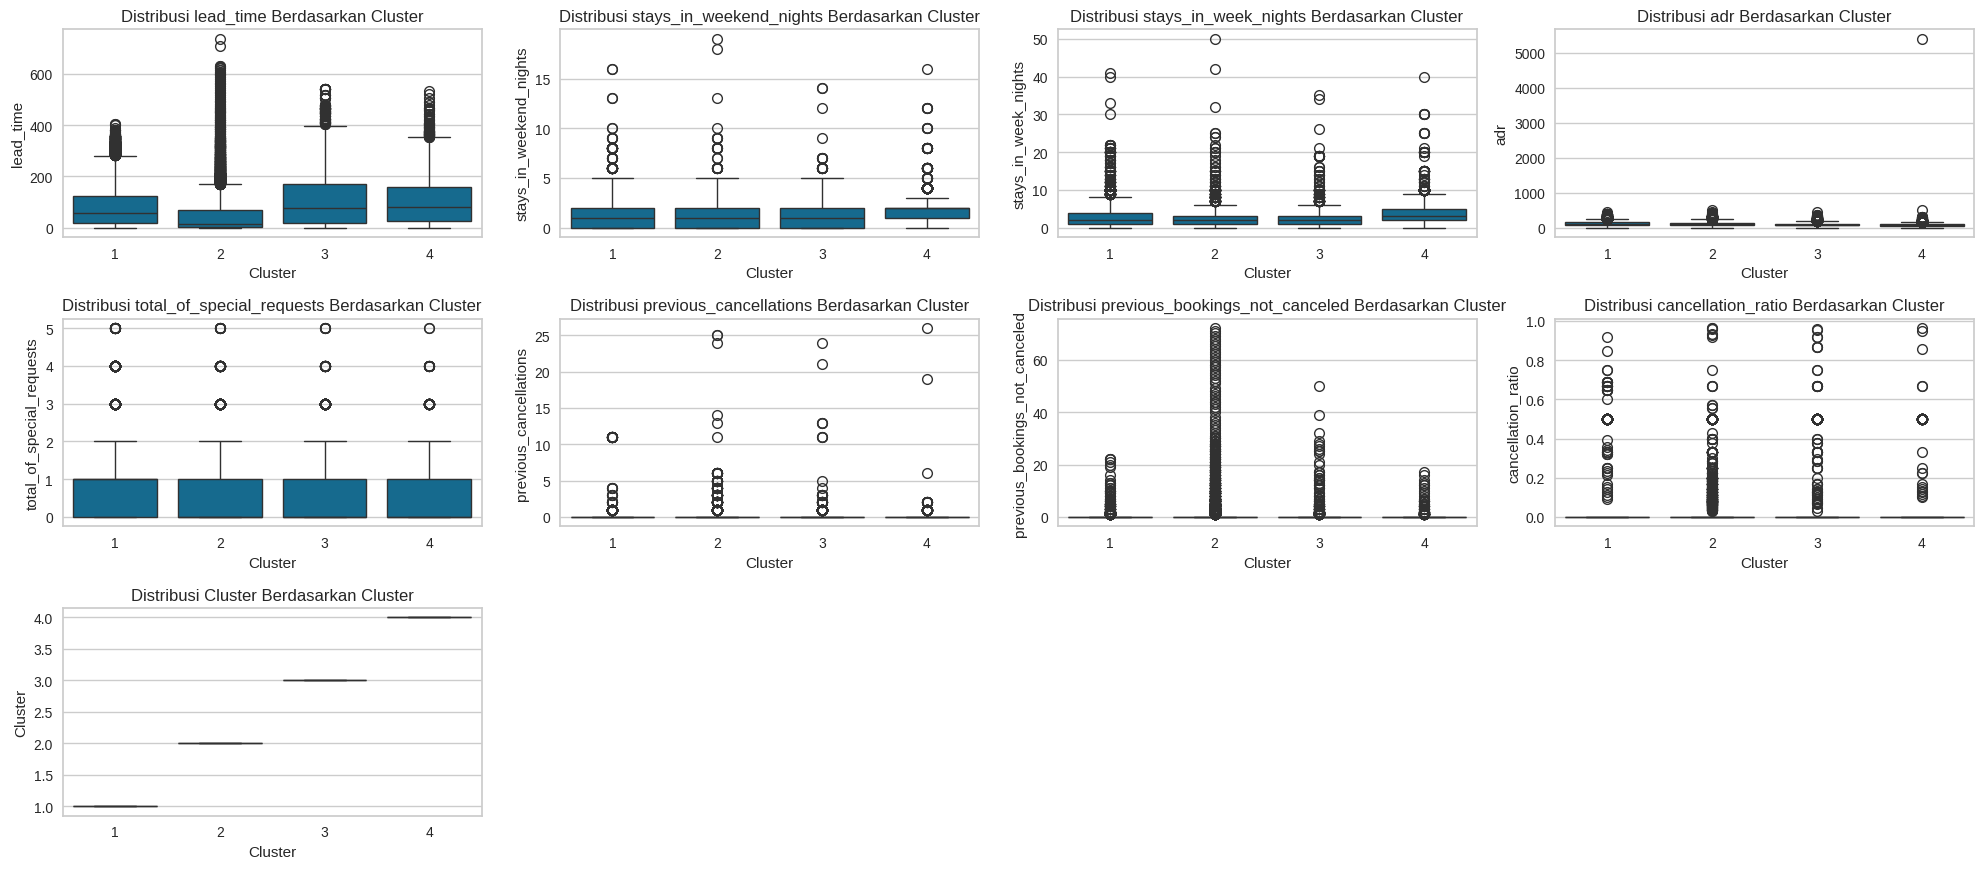

In [124]:
# deklarasi fitur numerik
fitur_Nums = df_normalized.select_dtypes(include=['number'])

num_plots = len(fitur_Nums)
n_cols, n_rows = 4, 7

# buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Iterasi membuat box plot
for i, feature in enumerate(fitur_Nums):
    sns.boxplot(x='Cluster', y=feature, data=df_normalized, ax=axes[i])
    axes[i].set_title(f"Distribusi {feature} Berdasarkan Cluster")
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# hapus subplot tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#**Analisis Karakteristik Cluster dari Model KMeans**  
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

**Cluster 1: Pelanggan Mewah dengan Perencanaan Matang**
> Pelanggan dalam cluster ini adalah individu yang memesan jauh-jauh hari melalui Online Travel Agent (OTA). Mereka memiliki daya beli tinggi dengan ADR (Average Daily Rate) tertinggi di antara semua cluster. Selain itu, mereka cenderung mengajukan lebih banyak special requests, menunjukkan ekspektasi layanan premium. Tingkat cancellation ratio mereka sangat rendah, menjadikan mereka segmen yang dapat diandalkan untuk pendapatan yang stabil. Hotel dapat memaksimalkan pendapatan dari segmen ini melalui promosi early bird, layanan eksklusif, serta penawaran premium add-ons.

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: mean[80.8 Hari])**: menandakan pelanggan dalam cluster ini memesan cukup jauh sebelum tanggal kedatangan.
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: max[16 malam], mean[1 malam])**: menunjukkan durasi menginap di akhir pekan yang lebih tinggi dibanding cluster lain
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: mean[2.67 malam])**: menunjukkan lama tinggal pada hari kerja sedikit lebih lama dibandingkan akhir pekan, menandakan preferensi untuk tinggal di hari kerja.  
4. **Pendapatan Harian Rata-rata (ADR: mean[120.13])**: Tarif harian di cluster ini adalah yang tertinggi di antara semua cluster, mengindikasikan pelanggan lebih memilih akomodasi dengan fasilitas atau layanan premium.  
5. **Jumlah Permintaan Khusus (Total Special Requests: mean[0.91])**: Cluster ini memiliki tingkat permintaan layanan tambahan tertinggi, seperti permintaan khusus terkait kamar atau fasilitas.  
6. **Riwayat Pemesanan yang dibatalkan (Previous Bookings Canceled: max[11] dan mean[0.016])**: Menunjukkan kecilnya tingkat pembatalan atau hampir tidak ada pembatalan sebelumnya, bahkan paling kecil dibanding cluster lain
7. **Riwayat Pemesanan yang tidak dibatalkan (Previous Bookings not Canceled: mean[0.025])**
Menunjukkan masih rendahnya tingkat pemesanan di kluster ini
8. **Tingkat Pembatalan (Cancellation Ratio: 0.005)**: Tingkat pembatalan di cluster ini sangat rendah.  
9. **Tipe Pelanggan (Customer Type)**: Hampir seluruh pelanggan termasuk dalam kategori **Transient (96.9%)**, yang berarti mereka memesan untuk kebutuhan individu atau perjalanan non-grup.  
10. **Segmen Pasar (Market Segment)**: Hampir seluruh pelanggan berasal dari **Online Travel Agent (100%)**, menunjukkan ketergantungan penuh pada platform digital untuk pemesanan.  
11. **Saluran Distribusi (Distribution Channel)**: Sebagian besar pemesanan menggunakan saluran agen perjalanan dan operator tur (99.4%).

---

**Cluster 2: Pelanggan Bisnis dan Pemesanan Langsung dengan Keputusan Cepat**
>  Cluster ini didominasi oleh pelanggan corporate dan direct bookers yang sering memesan mendekati tanggal kedatangan (lead time lebih pendek). Mereka memiliki ADR menengah dan cenderung lebih loyal meskipun tingkat cancellation ratio mereka lebih tinggi dibandingkan cluster lain. Pemesanan mereka biasanya dilakukan melalui direct channels dan perusahaan. Untuk menarik segmen ini, hotel dapat menawarkan corporate packages, diskon untuk pemesanan berulang, serta fleksibilitas dalam kebijakan pembatalan guna meningkatkan loyalitas dan konversi pemesanan.

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: mean[51.51 hari])**: Cluster ini memiliki lead time yang lebih pendek, menunjukkan kecenderungan pemesanan mendekati waktu kedatangan.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: mean[0.84 malam])**: Lama tinggal pada akhir pekan sangat rendah dibandingkan cluster lainnya.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: mean[2.29 malam])**: Lama tinggal di hari kerja juga relatif pendek.  
4. **Pendapatan Harian Rata-rata (ADR: mean[105.2])**: Tarif harian lebih rendah dibandingkan cluster l 1, menunjukkan pelanggan ini lebih sensitif terhadap harga.  
5. **Jumlah Permintaan Khusus (Total Special Requests: mean[0.57])**: Permintaan tambahan lebih rendah dibanding cluster 1.  
6. **Riwayat Pemesanan yang dibatalkan (Previous Bookings Canceled: max[25] dan mean[0.092])**: menunjukkan riwayat pembatalan pemesanan yang cukup tinggi
7. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: mean[0.97])**: riwayat pemesanan sebelumnya yang tidak dibatalkan lebih tinggi dibandingkan cluster lainnya, menunjukkan tingkat loyalitas tertentu dan tingkat pemesanan yang lebih tinggi
8. **Tingkat Pembatalan (Cancellation Ratio: mean[0.014])**: Cluster ini memiliki tingkat pembatalan cukup tinggi dibanding cluster lain
9. **Tipe Pelanggan (Customer Type)**: Didominasi oleh pelanggan **Transient (98.9%)**, dengan kontribusi kecil dari tipe pelanggan grup (0.9%).  
10. **Segmen Pasar (Market Segment)**: Sebagian besar berasal dari pemesanan langsung **Direct(69.4%)** dan dari perusahaan **corporate(19.8%)**
11. **Saluran Distribusi (Distribution Channel)**: Dominasi saluran pemesanan langsung (71.4%) dan perusahaan (21.5%).

---

**Cluster 3: Pelanggan Berkelompok dan Keluarga dengan Anggaran Terbatas**
> Pelanggan dalam cluster ini biasanya bepergian dalam kelompok kecil atau keluarga dengan preferensi harga yang lebih rendah (ADR paling kompetitif). Mereka menggunakan berbagai distribution channels, terutama offline travel agents dan online travel agents, untuk mencari penawaran terbaik. Meskipun kontribusi per malam lebih kecil, tingkat cancellation ratio mereka cukup rendah, menjadikan mereka sumber pemesanan yang stabil. Hotel dapat menarik segmen ini dengan menawarkan paket keluarga, bundling layanan, dan kerja sama strategis dengan agen perjalanan untuk meningkatkan volume pemesanan.

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: mean[108.7 hari])**: tertinggi dibanding cluster lain dimana pelanggan memesan cukup jauh sebelum tanggal kedatangan, mencerminkan perencanaan yang baik.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: mean[0.95 malam])**: Lama tinggal pada akhir pekan sedikit lebih tinggi dibandingkan Cluster 2.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: mean[2.54 malam])**: Lama tinggal pada hari kerja hampir setara dengan Cluster 1 (cukup tinggi).  
4. **Pendapatan Harian Rata-rata (ADR: mean[88.4])**: Tarif harian yang rendah, menunjukkan pelanggan ini sensitif terhadap harga.  
5. **Jumlah Permintaan Khusus (Total Special Requests: mean[0.54])**: Permintaan tambahan cukup rendah namun masih ada (hanya sedikit berbeda dengan cluster 2)
6. **Riwayat Pemesanan yang dibatalkan (Previous Bookings Canceled: max[24] dan mean[0.053])**: menunjukkan riwayat pembatalan yang cukup rendah namun masih ada
7. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: mean[0.14])**: menunjukkan tingkat pemesanan yang cukup baik namun masih kecil
8. **Tingkat Pembatalan (Cancellation Ratio: mean[0.01])**: Tingkat pembatalan rendah.  
9. **Tipe Pelanggan (Customer Type)**: Hampir seluruh pelanggan termasuk dalam kategori **Transient-Party (98.5%)**, menunjukkan pemesanan untuk kelompok kecil atau keluarga.  
10. **Segmen Pasar (Market Segment)**: Pemesanan tersebar dengan mayoritas berasal dari agen perjalanan offline (23.8%) dan online (28.6%) serta groups (29.2%).
11. **Saluran Distribusi (Distribution Channel)**: Didominasi oleh agen perjalanan dengan rata-rata 73.9%

---

**Cluster 4: Pelanggan Long-Stay dengan Anggaran Hemat melalui Agen Offline**
> Cluster ini terdiri dari pelanggan yang menginap dalam durasi yang lebih panjang, baik pada hari kerja maupun akhir pekan. Mereka umumnya memesan melalui offline travel agents dan memiliki ADR paling rendah, menunjukkan preferensi terhadap harga yang lebih ekonomis. Dengan tingkat hunian yang tinggi, segmen ini dapat dimaksimalkan melalui long-stay promotions, diskon untuk masa inap yang lebih panjang, serta layanan tambahan seperti meal plans atau akses ke fasilitas bisnis dan rekreasi.

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: 100.9 hari)**: Memiliki lead time tinggi, menunjukkan perencanaan matang untuk perjalanan.
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: mean[1.54 malam])**: Lama tinggal akhir pekan tertinggi di antara semua cluster.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: mean[3.75 malam])**: Lama tinggal pada hari kerja juga tertinggi, menunjukkan preferensi untuk tinggal lebih lama.  
4. **Pendapatan Harian Rata-rata (ADR: mean[81.1])**: Tarif harian paling rendah dibandingkan cluster lainnya. menunjukkan sensitifitas paling tinggi terhadap harga dan sedikitnya permintaan tambahan yang meningkatkan tarif
5. **Jumlah Permintaan Khusus (Total Special Requests: mean[0.36])**: Permintaan khusus paling rendah, menunjukkan kebutuhan layanan yang sederhana.  
6. **Riwayat Pemesanan yang dibatalkan (Previous Bookings Canceled: max[26] dan mean[0.022])**: menunjukkan tingkat pembatalan yang rendah namun tetap ada
7. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: mean[0.044])**: menunjukkan rendahnya tingkat pemesanan di cluster ini
8. **Tingkat Pembatalan (Cancellation Ratio: mean[0.008])**: Tingkat pembatalan cukup rendah.  
9. **Tipe Pelanggan (Customer Type)**: Sebagian besar pelanggan berasal dari kategori **Transient (81.8%) dan contract (16.43%)**, menunjukkan pemesanan untuk perorangan dan pekerja yang akan tinggal dalam waktu lebih lama
10. **Segmen Pasar (Market Segment)**: Pemesanan hampir seluruhnya melalui agen perjalanan offline (100%)
11. **Saluran Distribusi (Distribution Channel)**: Saluran distribusi didominasi oleh agen perjalanan (99.34%)

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [159]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77686 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       77686 non-null  float64
 1   stays_in_weekend_nights         77686 non-null  float64
 2   stays_in_week_nights            77686 non-null  float64
 3   adr                             77686 non-null  float64
 4   total_of_special_requests       77686 non-null  float64
 5   previous_cancellations          77686 non-null  float64
 6   previous_bookings_not_canceled  77686 non-null  float64
 7   cancellation_ratio              77686 non-null  float64
 8   customer_type_Contract          77686 non-null  float64
 9   customer_type_Group             77686 non-null  float64
 10  customer_type_Transient         77686 non-null  float64
 11  customer_type_Transient-Party   77686 non-null  float64
 12  market_segment_Aviation         7768

In [127]:
final_data.to_csv('Hotel_Booking_Clustering.csv', index=False)